In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score,confusion_matrix
import plotly.express as px

In [3]:
digits = fetch_openml("mnist_784")

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
df=pd.DataFrame(digits.data)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
targetdf = pd.DataFrame(digits.target)

In [8]:
targetdf

,0
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [9]:
digits.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
x=digits.data
y=digits.target.astype(np.int8)

In [11]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

In [12]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
x.shape,y.shape

((70000, 784), (70000,))

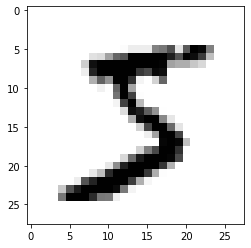

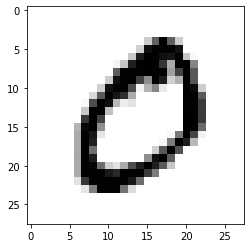

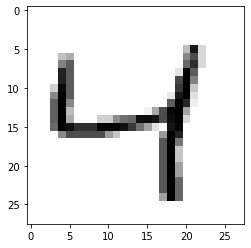

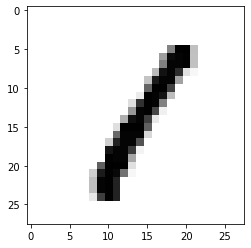

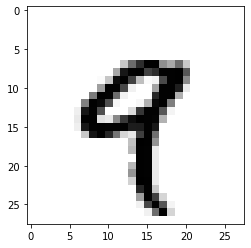

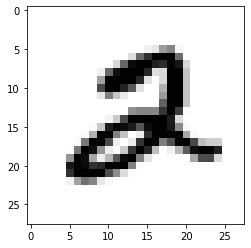

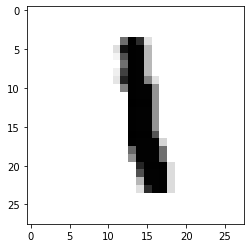

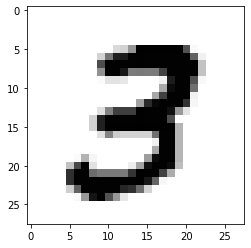

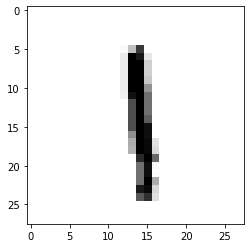

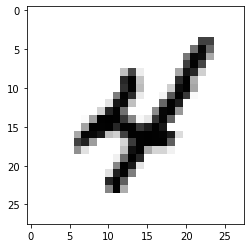

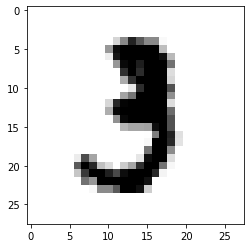

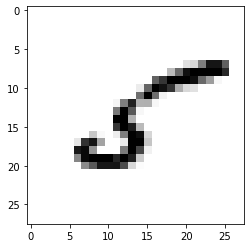

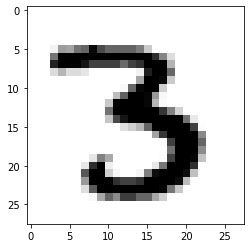

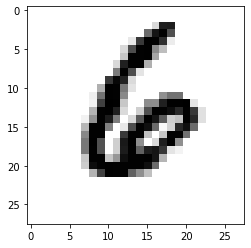

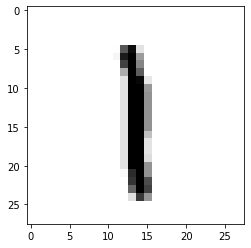

In [14]:
somedigits = x[:15]
for somedigit in somedigits:
    somedigit_image=somedigit.reshape(28,28)
    plt.imshow(somedigit_image,cmap=matplotlib.cm.binary)
    plt.axis="off"
    plt.show()

In [15]:
y[:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=int8)

In [16]:
trainx,testx,trainy,testy = train_test_split(x,y,test_size=0.3,random_state=12)

In [25]:
K=[]
ac=[]
for k in range(2,7):
    KNN_CLASS=KNeighborsClassifier(n_neighbors=k)
    KNN_CLASS = KNN_CLASS.fit(trainx[:50],trainy[:50])
    y_pred = KNN_CLASS.predict(trainx[:50])
    acc = accuracy_score(y_pred,trainy[:50])
    ac.append(acc)
    K.append(k)
df=pd.DataFrame(K,columns=["K"])
df["accuracy"]=ac
px.pie(df,names=df["K"],values=df["accuracy"],title="Pie plot of Accuracy for different k(n_neighbors) values",hole=0.3)


In [24]:
k=[]
acc=[]
for i in range(3,9):
    KNN_CLASS=KNeighborsClassifier(n_neighbors=i)
    KNN_CLASS = KNN_CLASS.fit(testx[:30],testy[:30])
    y_test_pred = KNN_CLASS.predict(testx[:30])
    accu = accuracy_score(y_test_pred,testy[:30])
    acc.append(accu)
    k.append(i)
df=pd.DataFrame(k,columns=["k"])
df["accuracy_score"]=acc
px.pie(df,names=df["k"],values=df["accuracy_score"],title="Pie plot of Accuracy for different k(n_neighbors) values",hole=0.3)
